# Exploring Dandiset 000617: Allen Institute Openscope - Sequence Learning Project

Version: 0.250312.0130

**Important Note:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview of the Dandiset

This Dandiset, [DANDI:000617](https://dandiarchive.org/dandiset/000617/0.250312.0130), is titled "Allen Institute Openscope - Sequence Learning Project".

**Description Summary:**
The project investigates predictive computations in the neocortex using a sequence learning experiment. Head-fixed mice passively view sequences of three different natural movie clips ('A', 'B', 'C'). Initially, clips are presented in random order. Then, mice are trained with repeating sequences (ABCABC...) to learn to predict the next clip. Neural activity is recorded using 2-photon microscopy from multiple cortical areas (V1, LM, AM, PM) in layers 2/3 and 4, focusing on excitatory neurons expressing GCaMP6f. The study aims to find evidence for predictive coding as a canonical computation in the neocortex.

**Keywords:** L2/3, L4, two-photon calcium imaging, prediction, pyramidal neurons, somata, neocortex, predictive coding, predictive processing, sequence learning, movies.

## What this notebook covers

This notebook will guide you through:
1. Listing required Python packages to run this notebook.
2. Loading the Dandiset metadata using the DANDI API.
3. Selecting and loading a specific NWB (Neurodata Without Borders) file from the Dandiset.
4. Summarizing the contents of the NWB file.
5. Visualizing some of the data contained within the NWB file, such as:
    - Delta F/F (dF/F) fluorescence traces for a few Regions of Interest (ROIs).
    - Image masks for the ROIs.
    - Animal running speed.
6. Providing a brief summary and suggesting potential future directions for analysis.

## Required Packages

This notebook requires the following Python packages. We assume they are already installed.

- `dandi`
- `pynwb`
- `h5py`
- `remfile`
- `numpy`
- `matplotlib`
- `seaborn` (optional, for styling)
- `pandas` (for displaying tables)

In [1]:
# Import necessary libraries
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Apply seaborn styling for plots (optional, but makes them look nicer)
# Do not use for image plots
sns.set_theme()

## Loading the Dandiset using the DANDI API

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "000617"
dandiset_version = "0.250312.0130"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}") # This will be the draft URL
print(f"Dandiset version-specific URL: https://dandiarchive.org/dandiset/{dandiset_id}/{dandiset_version}")

# List some assets in the Dandiset
assets_iterator = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets_iterator, 5):
    print(f"- {asset.path} (ID: {asset.identifier}, Size: {asset.size} bytes)")

Dandiset name: Allen Institute Openscope - Sequence Learning Project
Dandiset URL: https://dandiarchive.org/dandiset/000617/0.250312.0130
Dandiset version-specific URL: https://dandiarchive.org/dandiset/000617/0.250312.0130

First 5 assets:
- sub-684475/sub-684475_ses-1294084428-acq-1294179945-raw-movies_ophys.nwb (ID: 3eaf1acf-7a63-4286-a7c0-7a58d8cae2f8, Size: 21166274512 bytes)
- sub-684475/sub-684475_ses-1294084428-acq-1294179943-raw-movies_ophys.nwb (ID: 4cfa15bb-eac7-4273-9141-6d0cc2034506, Size: 21161416822 bytes)
- sub-684475/sub-684475_ses-1293785946-acq-1293914859-raw-movies_ophys.nwb (ID: d0b9a557-2c98-4fbc-af96-2318e6e5f2eb, Size: 21174751013 bytes)
- sub-684475/sub-684475_ses-1294084428-acq-1294179942-raw-movies_ophys.nwb (ID: 6b8f9ba6-2481-4c7b-b78c-38c2b878d246, Size: 21157674869 bytes)
- sub-684475/sub-684475_ses-1294259213-acq-1294370666-raw-movies_ophys.nwb (ID: c407d5e4-9431-4f94-b5d0-2b28069fa244, Size: 21179610915 bytes)


## Loading an NWB file

We will now load one of the NWB files from the Dandiset to explore its contents.

We've chosen the file: `sub-677038/sub-677038_ses-1280089433-acq-1280384858_ophys.nwb`.

The asset ID for this file is `27dd7936-b3e7-45af-aca0-dc98b5954d19`.
The download URL is constructed as: `https://api.dandiarchive.org/api/assets/&lt;ASSET_ID&gt;/download/`.

In [3]:
# Load the specific NWB file
# This is the file for which we retrieved detailed info earlier.
nwb_asset_id = "27dd7936-b3e7-45af-aca0-dc98b5954d19"
nwb_file_path_in_dandiset = "sub-677038/sub-677038_ses-1280089433-acq-1280384858_ophys.nwb"
nwb_url = f"https://api.dandiarchive.org/api/assets/{nwb_asset_id}/download/"

print(f"Loading NWB file: {nwb_file_path_in_dandiset}")
print(f"From URL: {nwb_url}")

remote_nwb_file = remfile.File(nwb_url)
h5_nwb_file = h5py.File(remote_nwb_file, mode='r') # Ensure read-only mode
io = pynwb.NWBHDF5IO(file=h5_nwb_file, mode='r') # Ensure read-only mode for PyNWB as well
nwbfile = io.read()

print("\nNWB file loaded successfully.")
print(f"Identifier: {nwbfile.identifier}")
print(f"Session description: {nwbfile.session_description}")
print(f"Session start time: {nwbfile.session_start_time}")

Loading NWB file: sub-677038/sub-677038_ses-1280089433-acq-1280384858_ophys.nwb
From URL: https://api.dandiarchive.org/api/assets/27dd7936-b3e7-45af-aca0-dc98b5954d19/download/



NWB file loaded successfully.
Identifier: 1280384858
Session description: Ophys Session
Session start time: 2023-06-30 16:04:51.055000+00:00


### Neurosift Link

You can explore this NWB file interactively on Neurosift using the following link:

[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/27dd7936-b3e7-45af-aca0-dc98b5954d19/download/&amp;dandisetId=000617&amp;dandisetVersion=0.250312.0130](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/27dd7936-b3e7-45af-aca0-dc98b5954d19/download/&amp;dandisetId=000617&amp;dandisetVersion=0.250312.0130)

### Summary of the NWB file contents

Let's look at the high-level structure and some metadata of this NWB file.

In [4]:
print("Key groups and data in the NWB file:")

print("\n--- General ---")
print(f"  NWBFile Identifier: {nwbfile.identifier}")
print(f"  Session Start Time: {nwbfile.session_start_time}")
print(f"  Subject ID: {nwbfile.subject.subject_id if nwbfile.subject else 'N/A'}")
print(f"  Experiment Description: {nwbfile.experiment_description}")
print(f"  Institution: {nwbfile.institution}")

if nwbfile.acquisition:
    print("\n--- Acquisition Data (nwbfile.acquisition) ---")
    for acq_name, acq_data in nwbfile.acquisition.items():
        print(f"  {acq_name} ({type(acq_data).__name__})")
        if hasattr(acq_data, 'data'):
            print(f"    Data shape: {acq_data.data.shape}, dtype: {acq_data.data.dtype}")
        if hasattr(acq_data, 'timestamps') and acq_data.timestamps is not None:
            print(f"    Timestamps shape: {acq_data.timestamps.shape}")

if nwbfile.processing:
    print("\n--- Processing Modules (nwbfile.processing) ---")
    for processing_module_name, processing_module in nwbfile.processing.items():
        print(f"  Module: {processing_module_name} ({processing_module.description})")
        for data_interface_name, data_interface in processing_module.data_interfaces.items():
            print(f"    Data Interface: {data_interface_name} ({type(data_interface).__name__})")
            if isinstance(data_interface, pynwb.ophys.RoiResponseSeries) or \
               isinstance(data_interface, pynwb.base.TimeSeries) or \
               isinstance(data_interface, pynwb.ophys.OphysEventDetection):
                if hasattr(data_interface, 'data'):
                    print(f"      Data shape: {data_interface.data.shape}, dtype: {data_interface.data.dtype}")
                if hasattr(data_interface, 'timestamps') and data_interface.timestamps is not None:
                     print(f"      Timestamps shape: {data_interface.timestamps.shape}")
            if isinstance(data_interface, pynwb.ophys.PlaneSegmentation):
                 print(f"      Plane Segmentation: description='{data_interface.description}', {len(data_interface.id)} ROIs")
            if isinstance(data_interface, pynwb.ophys.ImageSegmentation):
                for ps_name, ps_data in data_interface.plane_segmentations.items():
                    print(f"      Plane Segmentation '{ps_name}': {len(ps_data.id)} ROIs")
            if isinstance(data_interface, pynwb.ophys.DfOverF):
                for rrs_name, rrs_data in data_interface.roi_response_series.items():
                    print(f"      dF/F RoiResponseSeries '{rrs_name}': {rrs_data.data.shape[1]} ROIs, {rrs_data.data.shape[0]} timepoints")
            if isinstance(data_interface, pynwb.ophys.Fluorescence):
                for rrs_name, rrs_data in data_interface.roi_response_series.items():
                    print(f"      Fluorescence RoiResponseSeries '{rrs_name}': {rrs_data.data.shape[1]} ROIs, {rrs_data.data.shape[0]} timepoints")


if nwbfile.stimulus:
    print("\n--- Stimulus Data (nwbfile.stimulus) ---")
    for stim_name, stim_data in nwbfile.stimulus.items():
        print(f"  {stim_name} ({type(stim_data).__name__})")
        if hasattr(stim_data, 'data'):
           print(f"    Data shape: {stim_data.data.shape}, dtype: {stim_data.data.dtype}")

if nwbfile.stimulus_template:
    print("\n--- Stimulus Template Data (nwbfile.stimulus_template) ---")
    for stim_name, stim_data in nwbfile.stimulus_template.items():
        print(f"  {stim_name} ({type(stim_data).__name__})")
        if hasattr(stim_data, 'data'):
           print(f"    Data shape: {stim_data.data.shape}, dtype: {stim_data.data.dtype}")


if nwbfile.intervals:
    print("\n--- Intervals (nwbfile.intervals) ---")
    for interval_name, interval_data in nwbfile.intervals.items():
        print(f"  {interval_name} ({interval_data.description})")
        if hasattr(interval_data, 'to_dataframe'):
            try:
                df_interval = interval_data.to_dataframe()
                print(f"    Table with {len(df_interval)} rows and columns: {list(df_interval.columns)}")
            except Exception as e:
                print(f"    Could not convert {interval_name} to DataFrame: {e}")
        else:
            print(f"    Contains {len(interval_data.start_time)} intervals.")

Key groups and data in the NWB file:

--- General ---
  NWBFile Identifier: 1280384858
  Session Start Time: 2023-06-30 16:04:51.055000+00:00
  Subject ID: 677038
  Experiment Description: ophys session
  Institution: Allen Institute for Brain Science

--- Acquisition Data (nwbfile.acquisition) ---
  v_in (TimeSeries)
    Data shape: (252000,), dtype: float64
    Timestamps shape: (252000,)
  v_sig (TimeSeries)
    Data shape: (252000,), dtype: float64
    Timestamps shape: (252000,)

--- Processing Modules (nwbfile.processing) ---
  Module: ophys (Ophys processing module)
    Data Interface: corrected_fluorescence (Fluorescence)


AttributeError: module 'pynwb.ophys' has no attribute 'OphysEventDetection'

The NWB file contains several key data types:
- **Acquisition Data:** Raw acquired signals, like `v_sig` (Voltage signal from the running wheel encoder).
- **Processing Modules:**
    - `ophys`: Contains optical physiology data.
        - `corrected_fluorescence`: Fluorescence traces from ROIs.
        - `dff`: Delta F/F (dF/F) traces.
        - `event_detection`: Detected events (e.g., spikes) from fluorescence traces.
        - `image_segmentation`: Information about segmented ROIs, including their image masks.
        - `images`: Processed images like average projection or max projection.
    - `running`: Contains running speed information.
    - `stimulus`: Contains stimulus presentation timestamps.
- **Stimulus Templates:** Raw stimulus data, e.g., `movie_clip_A`.
- **Intervals:** Timestamps for various experimental epochs, like `movie_clip_A_presentations`.

## Visualizing Data from the NWB File

Now, let's visualize some of the data. We'll focus on:
1. dF/F traces for a few ROIs.
2. Image masks of the ROIs.
3. Running speed of the animal.

### 1. dF/F Traces

We'll plot the dF/F traces for the first few ROIs. These traces show the change in fluorescence relative to the baseline, which is often correlated with neural activity.

Imaging plane for dF/F: (512, 512) field of view in VISp at depth 175 um
Imaging rate: 10.0 Hz
Plotting dF/F for the first 3 ROIs out of 121 total ROIs.
Displaying the first 1000 timepoints out of 40019 total timepoints.


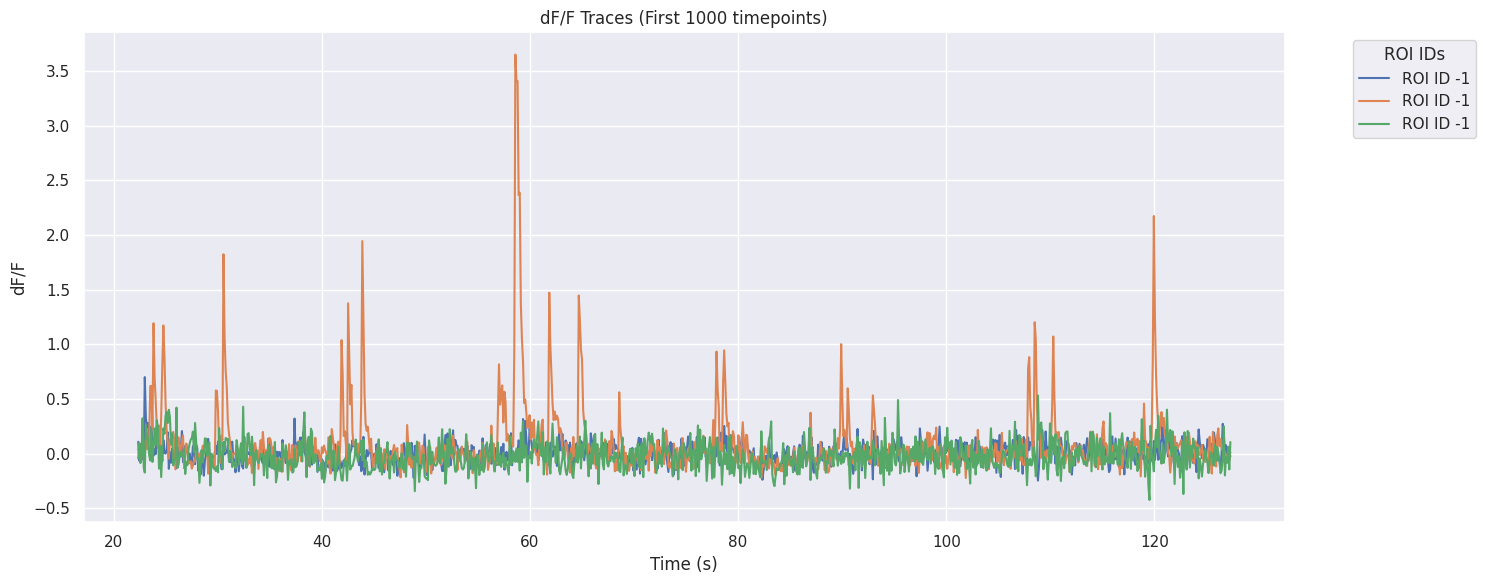

In [5]:
if 'ophys' in nwbfile.processing and 'dff' in nwbfile.processing['ophys'].data_interfaces:
    dff_interface = nwbfile.processing['ophys'].data_interfaces['dff']
    if 'traces' in dff_interface.roi_response_series:
        dff_traces_series = dff_interface.roi_response_series['traces']
        dff_data = dff_traces_series.data
        dff_timestamps = dff_traces_series.timestamps

        num_rois_to_plot = min(3, dff_data.shape[1])
        num_timepoints_to_plot = min(1000, dff_data.shape[0]) # Plot a subset of timepoints for speed

        imaging_plane = dff_traces_series.rois.table.imaging_plane
        print(f"Imaging plane for dF/F: {imaging_plane.description}")
        print(f"Imaging rate: {imaging_plane.imaging_rate} Hz")

        # To get actual ROI IDs, we need to access the 'id' column of the ROI table
        # or 'cell_specimen_id' if available and preferred.
        # The dff_traces_series.rois is a DynamicTableRegion that points to rows in the plane_segmentation table.
        # The plane_segmentation table is typically in nwbfile.processing['ophys']['image_segmentation']['cell_specimen_table']
        # or directly referred by dff_traces_series.rois.table
        roi_table = dff_traces_series.rois.table
        if 'cell_specimen_id' in roi_table.colnames:
            roi_ids = roi_table['cell_specimen_id'][:]
        else:
            roi_ids = roi_table.id[:] # Default to 'id' if 'cell_specimen_id' is not present

        print(f"Plotting dF/F for the first {num_rois_to_plot} ROIs out of {dff_data.shape[1]} total ROIs.")
        print(f"Displaying the first {num_timepoints_to_plot} timepoints out of {dff_data.shape[0]} total timepoints.")

        plt.figure(figsize=(15, 6))
        # use sns.set_theme() at the beginning for global seaborn style
        for i in range(num_rois_to_plot):
            # Load only the necessary data slice
            trace_data = dff_data[:num_timepoints_to_plot, i]
            time_data = dff_timestamps[:num_timepoints_to_plot]
            roi_actual_id = roi_ids[i] if i < len(roi_ids) else f"Index {i}"
            plt.plot(time_data, trace_data, label=f'ROI ID {roi_actual_id}')

        plt.title(f'dF/F Traces (First {num_timepoints_to_plot} timepoints)')
        plt.xlabel('Time (s)')
        plt.ylabel('dF/F')
        plt.legend(title="ROI IDs", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("dF/F 'traces' (RoiResponseSeries) not found.")
else:
    print("Processing module 'ophys' or data interface 'dff' not found.")

The plot above shows the dF/F activity for a few selected ROIs over a short period. Each line represents a different ROI. Peaks in these traces may indicate calcium transients, often associated with neural firing.

### 2. ROI Image Masks

Image masks show the spatial footprint of each segmented ROI in the imaging plane. We'll display the image masks for all ROIs overlaid on a single plot.

Number of ROIs: 121
Imaging plane dimensions from description: 512 (height) x 512 (width) pixels


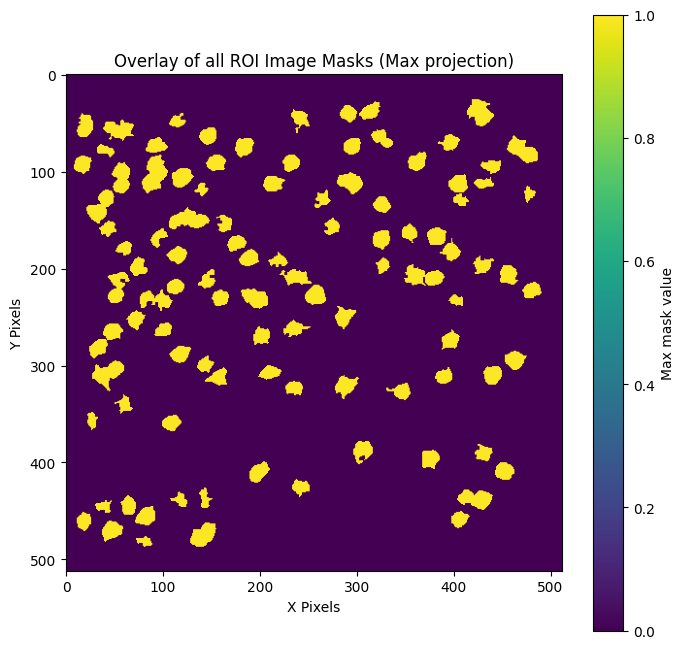

In [6]:
if 'ophys' in nwbfile.processing and \
   'image_segmentation' in nwbfile.processing['ophys'].data_interfaces and \
   'cell_specimen_table' in nwbfile.processing['ophys'].data_interfaces['image_segmentation'].plane_segmentations:

    plane_segmentation = nwbfile.processing['ophys'].data_interfaces['image_segmentation'].plane_segmentations['cell_specimen_table']
    image_masks = plane_segmentation['image_mask'][:] # Load all masks
    imaging_plane_meta = plane_segmentation.imaging_plane

    print(f"Number of ROIs: {len(image_masks)}")
    if len(image_masks) > 0:
        # Assume all masks are for the same imaging plane dimensions
        # Get dimensions from imaging_plane metadata if available, or infer from masks
        # The actual dimensions of the imaging plane are (height, width)
        # image_mask is (num_rois, height, width)
        # For 2D masks, shape is (height, width). For 3D masks one might need to select a plane.
        # Here, image_mask from PlaneSegmentation is typically a list of 2D arrays.
        # Let's determine the overall canvas size
        max_y = 0
        max_x = 0
        for mask_data in image_masks:
            if isinstance(mask_data, np.ndarray): # h5py.Dataset or np.ndarray
                 # mask_data can be a ragged array if masks have different shapes.
                 # If so, this approach needs adjustment. Assuming pixel masks for now (dense arrays).
                if mask_data.ndim == 2:
                    max_y = max(max_y, mask_data.shape[0])
                    max_x = max(max_x, mask_data.shape[1])

        # If masks are pixel masks (list of lists of pixel coords), this needs a different approach.
        # The example output of tools_cli implies image_mask is VectorData, usually meaning it's a table column.
        # In NWB, image_mask in PlainSegmentation is (num_rois, height, width) or (num_rois, num_pixels_per_roi, num_dims_per_pixel_coord)
        # The nwb-file-info output implies image_mask VectorData, which usually means a column in a DynamicTable.
        # For PlaneSegmentation, 'image_mask' is indeed a column, typically storing 2D arrays.

        # Let's try to get dimensions from the imaging_plane if image_mask is not a stack
        # The provided nwb-file-info shows imaging_plane description like "(512, 512) field of view..."
        # This suggests (height, width) or (width, height)
        # The image_mask datasets are likely (height, width) for each ROI
        plane_desc = imaging_plane_meta.description
        try:
            # Example: "(512, 512) field of view..."
            dims_str = plane_desc.split('(')[1].split(')')[0].split(',')
            plane_height = int(dims_str[0].strip())
            plane_width = int(dims_str[1].strip())
            print(f"Imaging plane dimensions from description: {plane_height} (height) x {plane_width} (width) pixels")
        except:
            print("Could not parse imaging plane dimensions from description. Inferring from masks if possible.")
            # Fallback if parsing fails, though this might be less reliable if masks vary in representation
            plane_height = max_y if max_y > 0 else 512 # Default fallback
            plane_width = max_x if max_x > 0 else 512  # Default fallback

        # Create a composite image by taking the max projection of all masks
        # Ensure all masks can be placed onto this canvas; pixel masks might need careful handling
        # Assuming image_masks are dense boolean or float arrays of shape (roi_height, roi_width)
        # and that their 'x', 'y' coordinates define their top-left corner in the plane.
        # For simplicity, if they are full-plane masks, we can stack them.
        # Given the structure of VectorData for image_mask, each element is likely a 2D array.
        
        # Check if image_masks is a 3D stack (num_rois, height, width)
        # The output of tools_cli suggests image_mask is a VectorData column, so it's a list of arrays.
        # We'll create an empty canvas and add each mask.
        # However, NWB standard also allows image_mask to be a 3D array if all masks are same size & for full plane.
        # For this dataset, it's typical that image_mask is a column where each entry is a 2D array.
        
        # Let's try to create a max projection.
        # This assumes all mask arrays in `image_masks` list have the same shape,
        # corresponding to the full imaging plane dimensions.
        # If they are smaller cutouts, this needs more complex placement logic using x, y coords.
        # For simplicity, let's assume they are full-plane masks (often 0s except for the ROI).
        
        # Check the first mask's shape to decide strategy
        first_mask_shape = image_masks[0].shape if len(image_masks) > 0 and isinstance(image_masks[0], np.ndarray) else None
        
        if first_mask_shape and len(first_mask_shape) == 2 and \
           first_mask_shape[0] == plane_height and first_mask_shape[1] == plane_width:
            # Masks seem to be full-plane sized. We can stack and max.
            try:
                all_masks_stack = np.array([m for m in image_masks if isinstance(m, np.ndarray) and m.shape == first_mask_shape])
                if all_masks_stack.ndim == 3: # (num_rois, height, width)
                    composite_mask = np.max(all_masks_stack, axis=0)
                    
                    plt.figure(figsize=(8, 8))
                    # No seaborn styling for images
                    plt.style.use('default') # Reset to default matplotlib style for this plot
                    plt.imshow(composite_mask, cmap='viridis', origin='upper') # origin='upper' is typical for images
                    plt.title('Overlay of all ROI Image Masks (Max projection)')
                    plt.xlabel('X Pixels')
                    plt.ylabel('Y Pixels')
                    plt.colorbar(label='Max mask value')
                    plt.show()
                    sns.set_theme() # Re-apply seaborn theme if it was set globally
                else:
                    print("Could not stack masks as expected (not all same shape or not 2D). Cannot create max projection this way.")
            except Exception as e:
                print(f"Error creating max projection of image masks: {e}. This might happen if masks have different shapes or types.")
        else:
            # Masks are likely ROI-specific cutouts or inconsistent.
            # Plotting these overlaid requires x,y coordinates from the table.
            # This is more complex, so we'll print a message.
            print(f"Image masks are not full-plane shaped (first mask shape: {first_mask_shape}, plane: ({plane_height},{plane_width})), or could not be processed as a stack. "
                  "Plotting individual masks or a more complex overlay using ROI x,y coordinates would be needed.")
            print("The 'image_mask' data may represent ROI cutouts rather than full-frame masks.")
            # As a fallback, show info about a few masks if possible
            for i in range(min(3, len(image_masks))):
                if isinstance(image_masks[i], np.ndarray):
                    print(f"  Mask {i} shape: {image_masks[i].shape}, dtype: {image_masks[i].dtype}, "
                          f"max value: {np.max(image_masks[i]) if image_masks[i].size > 0 else 'N/A'}")


    else:
        print("No image masks found in the plane segmentation.")
else:
    print("Image segmentation data ('ophys/image_segmentation/cell_specimen_table') not found or not structured as expected.")

The plot above (if generated) shows the spatial locations of the ROIs. Each colored region corresponds to an identified cell or ROI. Values typically range from 0 to 1, indicating the likelihood of a pixel belonging to an ROI.
If the plot was not generated, it means the image masks might be stored in a format that requires more complex rendering (e.g., individual cutouts that need to be placed on a canvas using their x,y coordinates).

### 3. Running Speed

The NWB file may also contain information about the animal's running speed during the experiment. Let's plot this if available.

Plotting running speed. Displaying 10000 out of 252000 total timepoints.


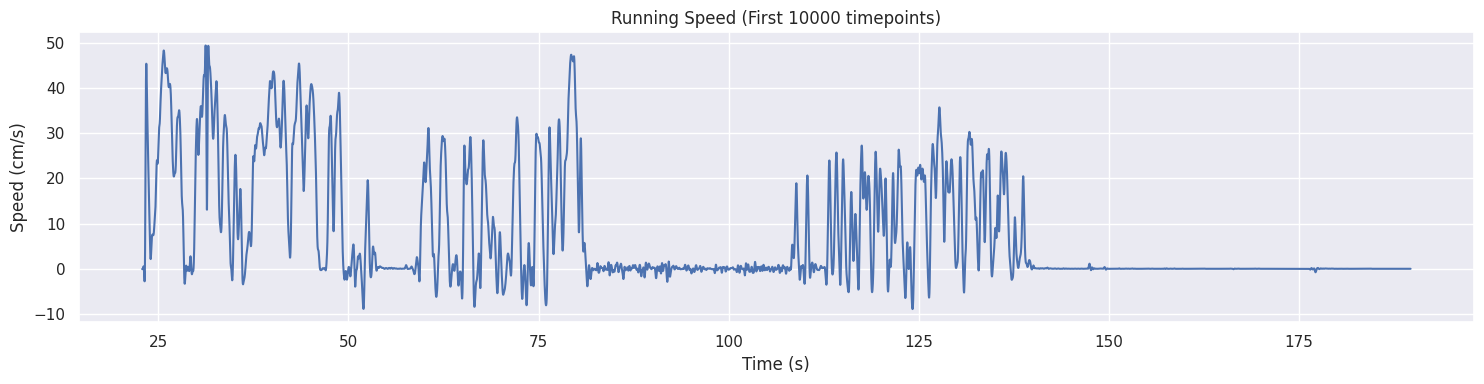

In [7]:
if 'running' in nwbfile.processing and 'speed' in nwbfile.processing['running'].data_interfaces:
    running_speed_series = nwbfile.processing['running'].data_interfaces['speed']
    running_speed_data = running_speed_series.data
    running_speed_timestamps = running_speed_series.timestamps

    # Plot a subset for performance if the data is very long
    num_points_to_plot = min(10000, len(running_speed_data))
    
    speed_data_subset = running_speed_data[:num_points_to_plot]
    time_data_subset = running_speed_timestamps[:num_points_to_plot]

    print(f"Plotting running speed. Displaying {num_points_to_plot} out of {len(running_speed_data)} total timepoints.")

    plt.figure(figsize=(15, 4))
    # sns.set_theme() style applied globally
    plt.plot(time_data_subset, speed_data_subset)
    plt.title(f'Running Speed (First {num_points_to_plot} timepoints)')
    plt.xlabel('Time (s)')
    plt.ylabel(f'Speed ({running_speed_series.unit})')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Running speed data ('processing/running/speed') not found.")

This plot shows the animal's running speed over time. This can be useful for correlating neural activity with behavioral states (e.g., movement vs. stillness).

## Summary and Future Directions

This notebook demonstrated how to:
- Access and understand metadata for Dandiset 000617.
- Load a specific NWB file from the Dandiset using its URL.
- Get an overview of an NWB file's contents, including ophys data, stimulus information, and behavioral data like running speed.
- Visualize key data types:
    - dF/F fluorescence traces for selected ROIs.
    - ROI image masks (attempted max projection).
    - Animal's running speed.

**Possible Future Directions for Analysis:**

1.  **Event Analysis:** Explore the `event_detection` data to analyze the timing and properties of detected neural events (e.g., inferred spikes) in relation to stimuli or behavior.
2.  **Stimulus Correlation:** Correlate neural activity (dF/F traces or events) with the presentation times of different movie clips (`movie_clip_A_presentations`, etc.) found in `nwbfile.intervals`. This could reveal cells that are selectively responsive to specific stimuli.
3.  **Sequence Learning Effects:** Compare neural responses to movie clips presented in random order versus in trained sequences. This is central to the Dandiset's theme of predictive coding. This would likely involve comparing data across different NWB files (sessions) within the Dandiset.
4.  **Behavioral State Modulation:** Analyze how running speed or other behavioral variables modulate neural activity.
5.  **Population Dynamics:** Investigate patterns of activity across the entire population of recorded neurons (e.g., using dimensionality reduction techniques).
6.  **Cross-Area Comparisons:** If data from multiple cortical areas are available within this file or across files in the Dandiset, compare their response properties. The `imaging_plane.location` field can indicate the cortical area.
7.  **Movie Stimulus Analysis:** Load and inspect the actual movie frames from `nwbfile.stimulus_template` (e.g., `movie_clip_A.data`) and relate them to neural responses. (Note: these can be large).

Remember that this notebook only scratches the surface. The full Dandiset contains many more files and potentially richer data for exploring the complexities of sequence learning and predictive processing in the brain.

---
End of AI-Generated Notebook.

In [8]:
# Close the HDF5 file associated with the NWB file reader
# This is good practice, especially if loops or multiple file operations were planned.
# For a single read like this, it might not be strictly necessary if the script ends,
# but it's a good habit.
try:
    io.close()
    # The remfile.File might also need closing if it has a close method,
    # but typically it's managed by the h5py.File object.
    # h5_nwb_file is closed by io.close() if it was opened by the NWBHDF5IO object.
    # If we opened h5_nwb_file ourselves (which we did), we should close it.
    # However, pynwb.NWBHDF5IO takes owership of the file object passed to it if manage_file=True (default)
    # and closes it when its own close() method is called or when the IO object is garbage collected.
    # So, io.close() should be sufficient.
    print("\nNWB HDF5 IO closed.")
except Exception as e:
    print(f"Error closing NWB HDF5 IO: {e}")

# The remfile itself may also be explicitly closed if needed,
# though h5py often handles the underlying file object.
# Let's check if remote_nwb_file has a close method.
if hasattr(remote_nwb_file, 'close'):
    try:
        remote_nwb_file.close()
        print("Remote file object closed.")
    except Exception as e:
        print(f"Error closing remote file object: {e}")


NWB HDF5 IO closed.
Remote file object closed.
